In [1]:
import pandas as pd
#import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [3]:
# Lire le fichier Excel
df = pd.read_excel("train.xlsx")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360,1.0,Urban,Y


# ANOVA à 1 facteur

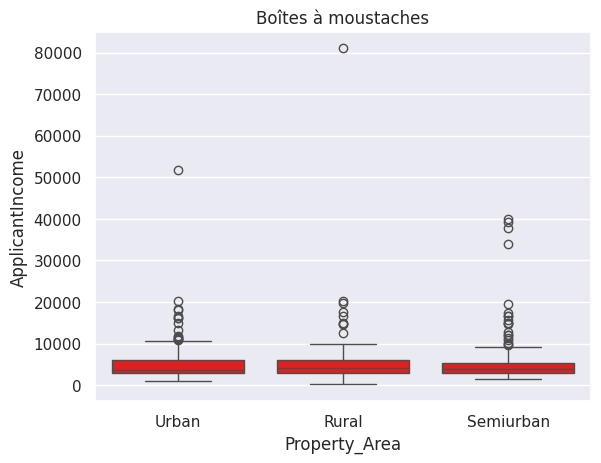

In [6]:
sns.set()

ax = sns.boxplot(x="Property_Area", y="ApplicantIncome", data=df, color='red')
plt.xlabel('Property_Area')
plt.ylabel('ApplicantIncome')
plt.title('Boîtes à moustaches')
plt.show()

Interprétation:

Le diagramme en boites montre la répartition du nombre de demandes de prêt dans trois zones géographiques différentes : urbaine, rurale et semi-urbaine. Le nombre médian de demandes est plus élevé pour les propriétés urbaines, suivi des propriétés semi-urbaines, puis des propriétés rurales. Cela suggère qu'il y a plus de variabilité dans le nombre de demandes de prêt pour les propriétés urbaines que pour les propriétés rurales.

In [9]:
anova_Property_Area = smf.ols('ApplicantIncome~Property_Area', data=df).fit()
sm.stats.anova_lm(anova_Property_Area)

,df,sum_sq,mean_sq,F,PR(>F)
Property_Area,2.0,1.114171e+07,5.570853e+06,0.156693,0.855008
Residual,507.0,1.802521e+10,3.555268e+07,NaN,NaN


Interprétation:  
Le tableau ANOVA montre que la zone géographique n'a pas d'effet significatif sur le revenu de demande. Cela s'explique par le fait que la valeur de F (0,156693) est inférieure au seuil de signification (habituellement fixé à 0,05). La valeur de p (0,855008) est également supérieure au seuil de signification, ce qui renforce la conclusion qu'il n'existe pas de relation significative entre la zone géographique et le revenu de demande.

# ANOVA 2 facteurs


In [12]:
anova_Property_Area_Education= smf.ols('ApplicantIncome~Property_Area+Education', data=df).fit()
sm.stats.anova_lm(anova_Property_Area_Education)

,df,sum_sq,mean_sq,F,PR(>F)
Property_Area,2.0,1.114171e+07,5.570853e+06,0.159296,0.852786
Education,1.0,3.295591e+08,3.295591e+08,9.423611,0.002257
Residual,506.0,1.769565e+10,3.497164e+07,NaN,NaN


Interprétation des résultats

Property_Area : Le facteur Property_Area n'a pas d'effet significatif sur le ApplicantIncome (p-value = 0,8528). Cela signifie qu'il n'y a pas de différence significative dans le revenu moyen des candidats en fonction de la superficie de la propriété.
Education : Le facteur Education a un effet significatif sur le ApplicantIncome (p-value = 0,0023). Cela signifie qu'il existe une différence significative dans le revenu moyen des candidats en fonction de leur niveau d'éducation

# ANOVA à 2 facteurs avec interaction

In [13]:
anova_Property_Area_Education = smf.ols('ApplicantIncome~Property_Area*Education', data=df).fit()
sm.stats.anova_lm(anova_Property_Area_Education)

,df,sum_sq,mean_sq,F,PR(>F)
Property_Area,2.0,1.114171e+07,5.570853e+06,0.158749,0.853253
Education,1.0,3.295591e+08,3.295591e+08,9.391261,0.002297
Property_Area:Education,2.0,9.227634e+06,4.613817e+06,0.131477,0.876829
Residual,504.0,1.768642e+10,3.509211e+07,NaN,NaN


Interaction: Il n'y a pas d'interaction significative entre Property_Area et Education (p-value = 0,8768). Cela signifie que l'effet de Education sur ApplicantIncome est constant quel que soit la valeur de Property_Area, car il ya pas d'effet de Property_Area car p-value = 0,8768>0.05 

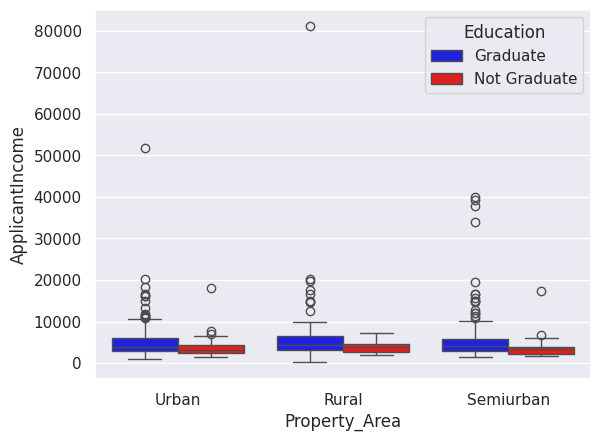

In [15]:
ax=sns.boxplot(x="Property_Area", y="ApplicantIncome", hue="Education", data=df, palette={"Graduate": "blue", "Not Graduate": "red"})
plt.show()

Interprétation:

D'après l'analyse du diagramme en boîte à moustaches, on peut conclure que le revenu des candidats est influencé par la zone immobilière et le niveau d'éducation. Les candidats vivant en zone rural et les diplômés ont un revenu médian plus élevé que les candidats vivant en zone urban ou semi-urbaine et les non-diplômés. Il y a également une interaction entre la zone immobilière et le niveau d'éducation, ce qui signifie que l'effet de la zone immobilière sur le revenu des candidats est différent selon le niveau d'éducation.